In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("TCPA_data_sel.csv")
df.describe()

14-3-3_beta  14-3-3_epsilon  14-3-3_zeta       4E-BP1  4E-BP1_pS65  \
count  4730.000000     4730.000000  4730.000000  4730.000000  4730.000000   
mean      0.131235        0.048807     0.030119    -0.106165    -0.117268   
std       0.255021        0.213059     0.458190     0.547172     0.323850   
min      -0.568555       -0.763244    -1.705413    -1.587143    -0.948662   
25%      -0.030942       -0.084692    -0.269684    -0.474556    -0.335679   
50%       0.095708        0.031862    -0.020659    -0.155661    -0.157227   
75%       0.257144        0.157120     0.288529     0.198157     0.046422   
max       2.549330        1.465643     2.621265     3.353672     2.229475   

       4E-BP1_pT37T46  4E-BP1_pT70        53BP1  A-Raf_pS299     ACC_pS79  \
count     4730.000000  4730.000000  4730.000000  4730.000000  4730.000000   
mean        -0.030818    -0.072869    -0.395433     0.153473    -0.179074   
std          0.684176     0.222941     0.635969     0.294107     0.667901   
min         -2.494207    -0.946725    -3.015576    -0.733863    -1.866803   
25%         -0.473651    -0.223288    -0.781186    -0.038433    -0.643441   
50%         -0.050119    -0.097327    -0.399447     0.113444    -0.219660   
75%          0.399790     0.044166     0.027085     0.298945     0.224739   
max          2.774409     1.340735     1.949755     2.007673     3.562286   

       ...          VHL         XBP1        XRCC1          YAP    YAP_pS127  \
count  ...  4730.000000  4730.000000  4730.000000  4730.000000  4730.000000   
mean   ...     0.269113     0.120252    -0.123708     0.068784     0.077516   
std    ...     1.866953     0.512858     0.309308     0.372062     0.694338   
min    ...    -4.725390    -1.285231    -1.431434    -0.970706    -2.663887   
25%    ...    -0.948802    -0.186287    -0.327753    -0.173337    -0.325141   
50%    ...     0.513217     0.046252    -0.137967     0.040292     0.111494   
75%    ...     1.671877     0.326463     0.072138     0.265069     0.510848   
max    ...     5.910500     4.551599     1.819225     3.776835     4.232068   

              YB-1   YB-1_pS102         JAB1         MSH2         MSH6  
count  4730.000000  4730.000000  4730.000000  4730.000000  4730.000000  
mean     -0.039983     0.038932     0.100919    -0.177031    -0.350561  
std       0.407706     0.292154     0.369086     0.394802     0.613382  
min      -2.203895    -0.789901    -1.715574    -2.278129    -1.855819  
25%      -0.255013    -0.159044    -0.111880    -0.452288    -0.816796  
50%      -0.060369     0.010977     0.075384    -0.183042    -0.437192  
75%       0.144900     0.197751     0.279096     0.060111     0.042877  
max       2.990685     2.067411     3.122413     1.662596     2.268447  

[8 rows x 189 columns]

In [3]:
X = df.iloc[:, 2:]
tumor = df.Tumor.astype('category')
y = tumor.cat.codes.values

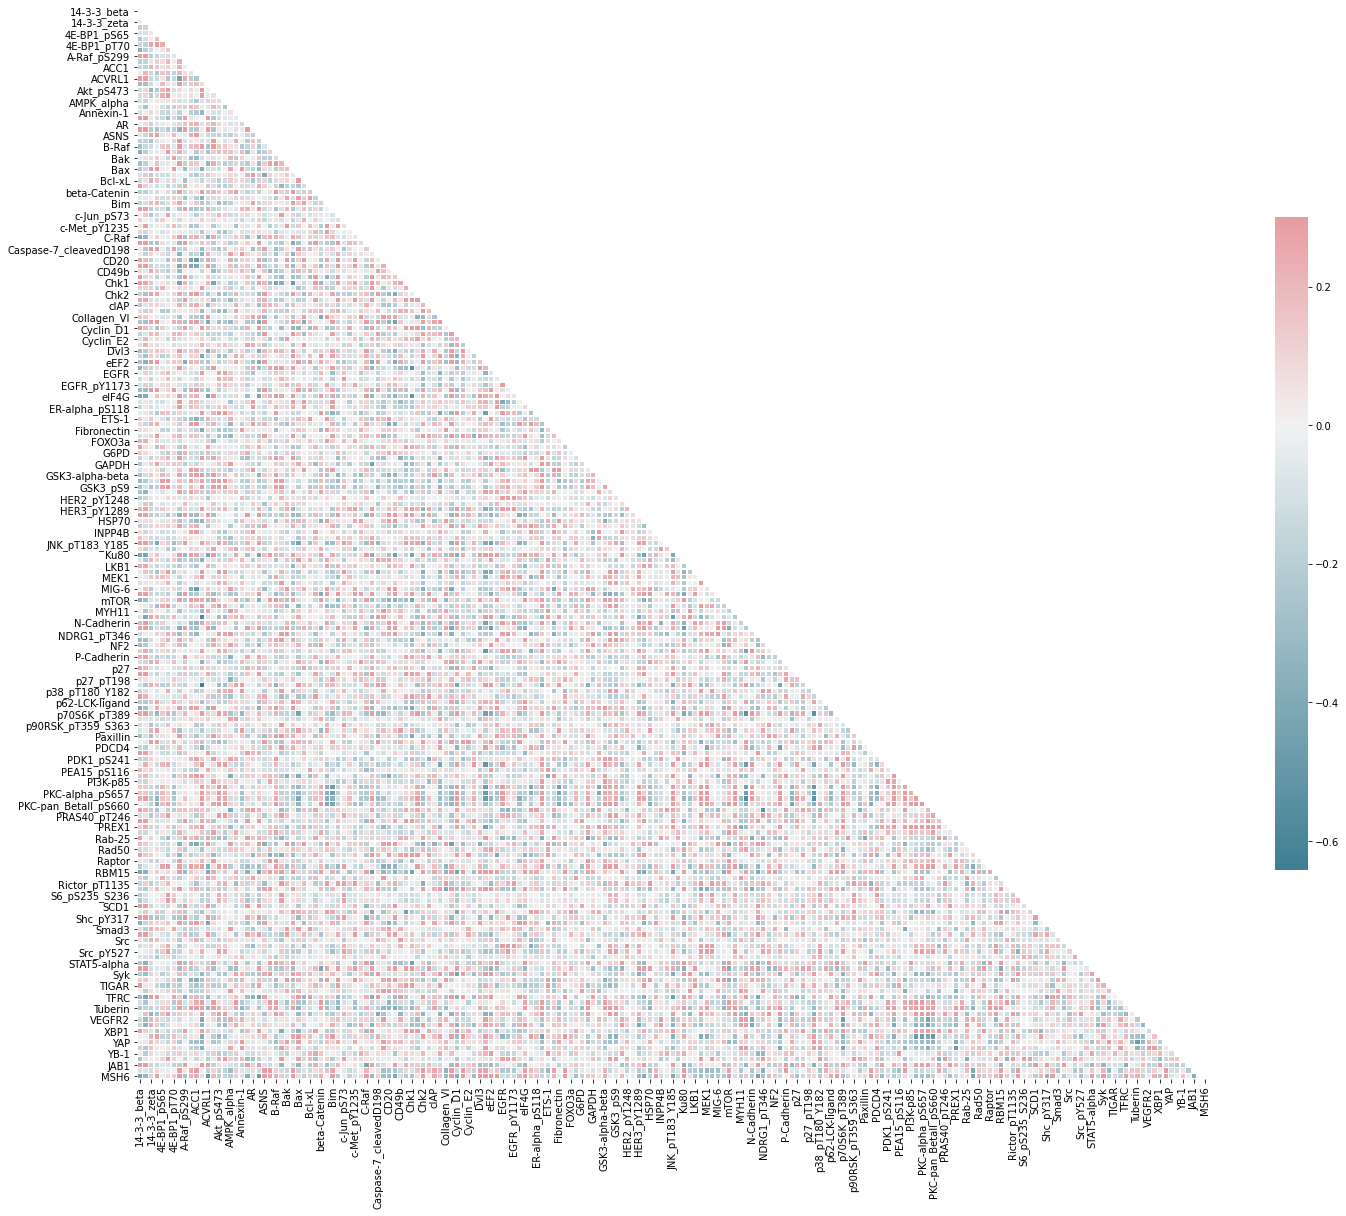

In [4]:
def plot(arr):
    mask = np.triu(np.ones_like(np.ones(arr.corr().shape), dtype=np.bool), -1)
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    plt.figure(figsize=(24, 24))
    sns.heatmap(arr.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
plot(X)

In [5]:
np.abs(X.corr())

14-3-3_beta  14-3-3_epsilon  14-3-3_zeta    4E-BP1  \
14-3-3_beta        1.000000        0.353861     0.011014  0.183166   
14-3-3_epsilon     0.353861        1.000000     0.247007  0.149118   
14-3-3_zeta        0.011014        0.247007     1.000000  0.408912   
4E-BP1             0.183166        0.149118     0.408912  1.000000   
4E-BP1_pS65        0.080286        0.092250     0.045519  0.122106   
...                     ...             ...          ...       ...   
YB-1               0.024113        0.210177     0.085504  0.036351   
YB-1_pS102         0.241991        0.046551     0.010118  0.034045   
JAB1               0.475446        0.592135     0.157093  0.148927   
MSH2               0.087470        0.073433     0.103092  0.094103   
MSH6               0.431220        0.318416     0.110311  0.279487   

                4E-BP1_pS65  4E-BP1_pT37T46  4E-BP1_pT70     53BP1  \
14-3-3_beta        0.080286        0.226017     0.138698  0.361370   
14-3-3_epsilon     0.092250        0.103359     0.182844  0.201915   
14-3-3_zeta        0.045519        0.023475     0.271737  0.123900   
4E-BP1             0.122106        0.164394     0.484563  0.008765   
4E-BP1_pS65        1.000000        0.360688     0.246998  0.045667   
...                     ...             ...          ...       ...   
YB-1               0.033070        0.127743     0.126528  0.124489   
YB-1_pS102         0.100345        0.341653     0.105989  0.007066   
JAB1               0.070248        0.092139     0.179313  0.199245   
MSH2               0.033798        0.034055     0.005920  0.320541   
MSH6               0.026631        0.090905     0.136928  0.526924   

                A-Raf_pS299  ACC_pS79  ...       VHL      XBP1     XRCC1  \
14-3-3_beta        0.275572  0.183179  ...  0.152643  0.410011  0.018572   
14-3-3_epsilon     0.350560  0.162423  ...  0.350644  0.133449  0.018637   
14-3-3_zeta        0.200254  0.056717  ...  0.241203  0.081640  0.217487   
4E-BP1             0.157154  0.117383  ...  0.137377  0.228257  0.281891   
4E-BP1_pS65        0.078455  0.070668  ...  0.162008  0.050994  0.170508   
...                     ...       ...  ...       ...       ...       ...   
YB-1               0.083202  0.059453  ...  0.093447  0.202175  0.044534   
YB-1_pS102         0.149153  0.015512  ...  0.149593  0.287446  0.150585   
JAB1               0.500295  0.013371  ...  0.169974  0.324132  0.118401   
MSH2               0.056181  0.254561  ...  0.117979  0.013539  0.318522   
MSH6               0.269439  0.229996  ...  0.218844  0.213482  0.323495   

                     YAP  YAP_pS127      YB-1  YB-1_pS102      JAB1      MSH2  \
14-3-3_beta     0.016334   0.158746  0.024113    0.241991  0.475446  0.087470   
14-3-3_epsilon  0.052157   0.225210  0.210177    0.046551  0.592135  0.073433   
14-3-3_zeta     0.180500   0.162668  0.085504    0.010118  0.157093  0.103092   
4E-BP1          0.107531   0.053127  0.036351    0.034045  0.148927  0.094103   
4E-BP1_pS65     0.058914   0.011530  0.033070    0.100345  0.070248  0.033798   
...                  ...        ...       ...         ...       ...       ...   
YB-1            0.107539   0.018105  1.000000    0.095851  0.168682  0.053429   
YB-1_pS102      0.160140   0.153399  0.095851    1.000000  0.220649  0.219650   
JAB1            0.165112   0.225805  0.168682    0.220649  1.000000  0.022217   
MSH2            0.108188   0.121995  0.053429    0.219650  0.022217  1.000000   
MSH6            0.066719   0.034302  0.167384    0.024639  0.369977  0.681890   

                    MSH6  
14-3-3_beta     0.431220  
14-3-3_epsilon  0.318416  
14-3-3_zeta     0.110311  
4E-BP1          0.279487  
4E-BP1_pS65     0.026631  
...                  ...  
YB-1            0.167384  
YB-1_pS102      0.024639  
JAB1            0.369977  
MSH2            0.681890  
MSH6            1.000000  

[189 rows x 189 columns]

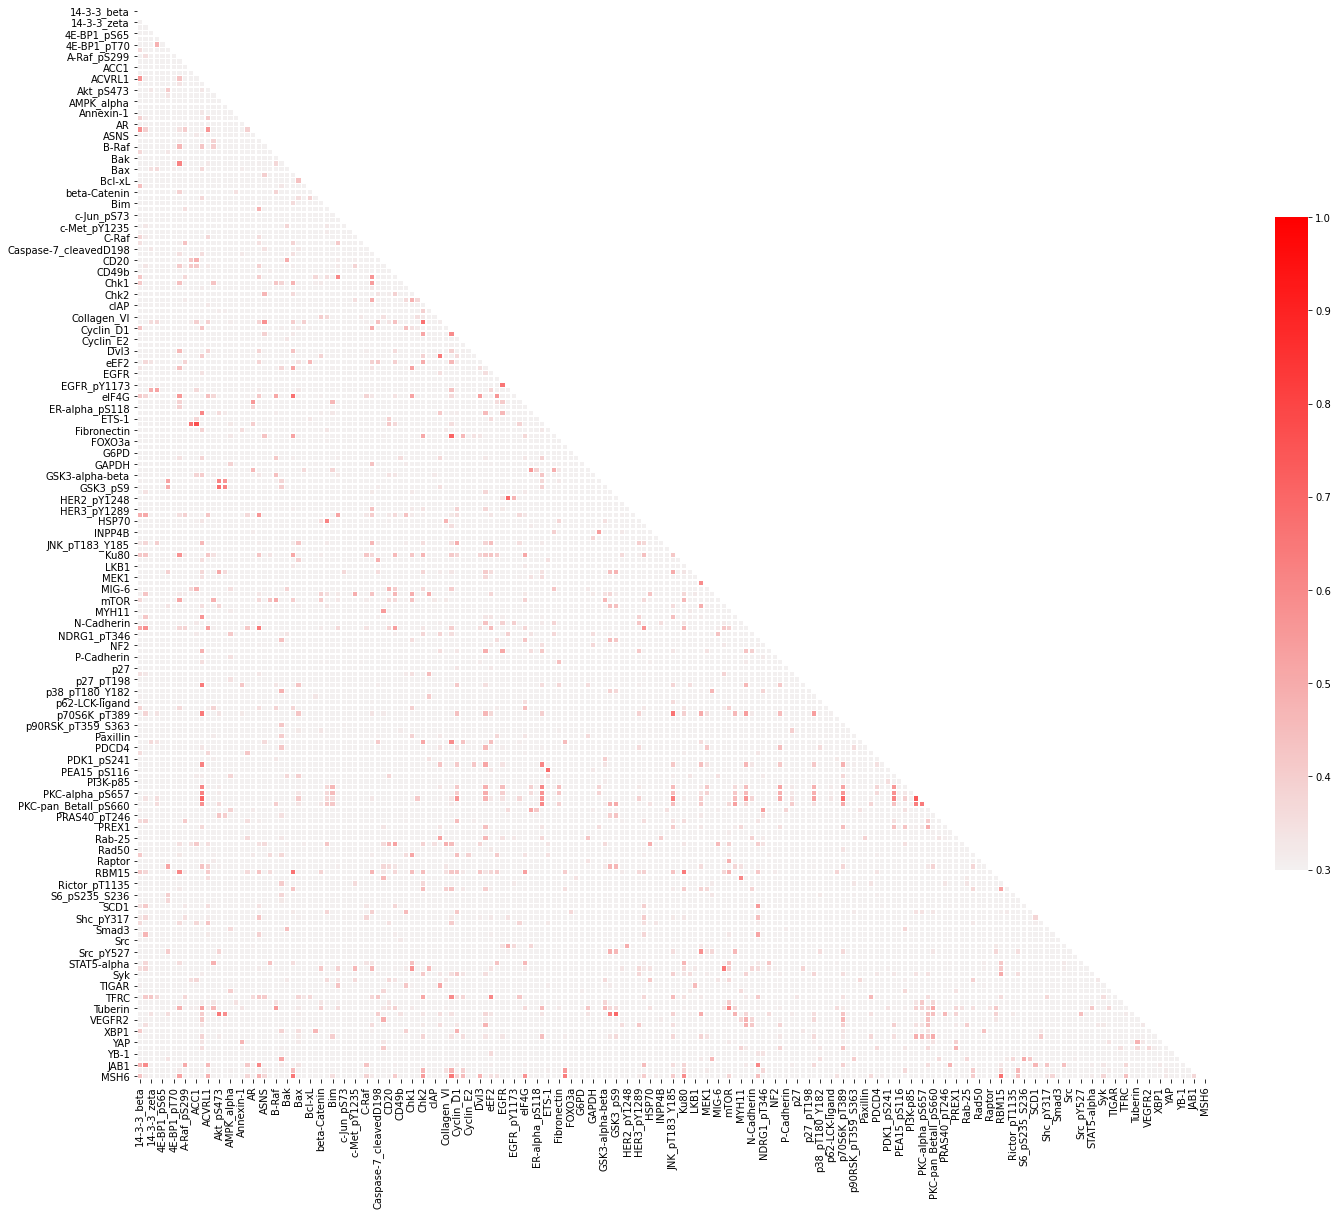

In [6]:
def plot2(arr, vmin=0.3):
    mask = np.triu(np.ones_like(np.ones(arr.corr().shape), dtype=np.bool), -1)
    cmap = sns.color_palette("light:r", as_cmap=True)
    plt.figure(figsize=(24, 24))
    sns.heatmap(np.abs(arr.corr()), mask=mask, cmap=cmap, vmax=1, vmin=vmin,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
plot2(X)

In [29]:
import networkx as nx
corrmat = X.corr()
proteoms = corrmat.index.values
corrmat = np.array(corrmat)
corrmat[np.abs(corrmat) < 0.4] = 0

G = nx.from_numpy_matrix(corrmat)
G = nx.relabel_nodes(G, lambda x: proteoms[x])
G.edges(data=True);

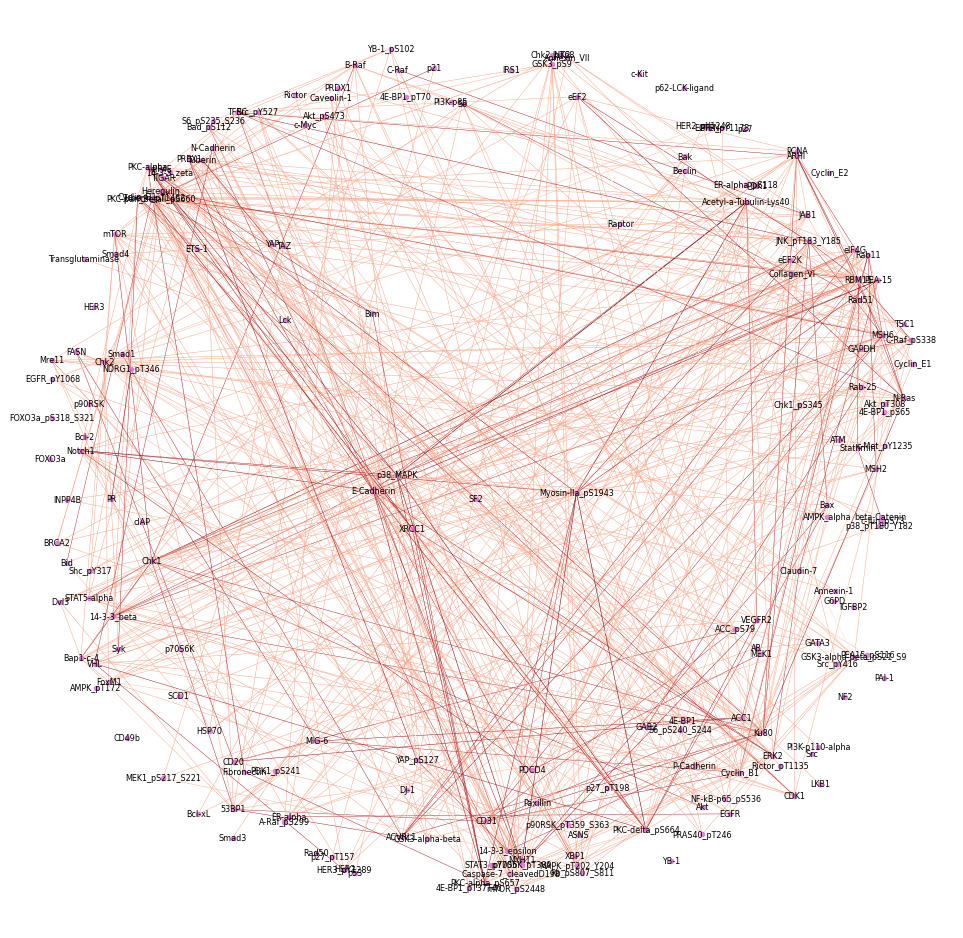

In [37]:
def create_corr_network_1(G, cmap):
    #crates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

    #positions
#     positions=nx.spectral_layout(G)
    positions=nx.spring_layout(G)
#     positions=nx.shell_layout(G)
    #positions=nx.random_layout(G)
    
    #Figure size
    plt.figure(figsize=(17,17))

    #draws nodes
    nx.draw_networkx_nodes(G,positions,node_color='#DA70D6',node_size=20,alpha=0.8)
    
    #Styling for labels
    nx.draw_networkx_labels(G, positions, font_size=8, font_family='sans-serif')
    # edge styling
    edge_colour = plt.cm.PuRd
#    weights = tuple([x*3 for x in weights])
    
    #draws the edges
    nx.draw_networkx_edges(G, positions, edgelist=edges, style='solid',
                           width=weights, edge_color=weights, edge_cmap=cmap)
    
    # displays the graph without axis
    plt.axis('off')
    #saves image
    plt.savefig("part1.png", format="PNG")
    plt.show() 

create_corr_network_1(G, plt.cm.Reds)

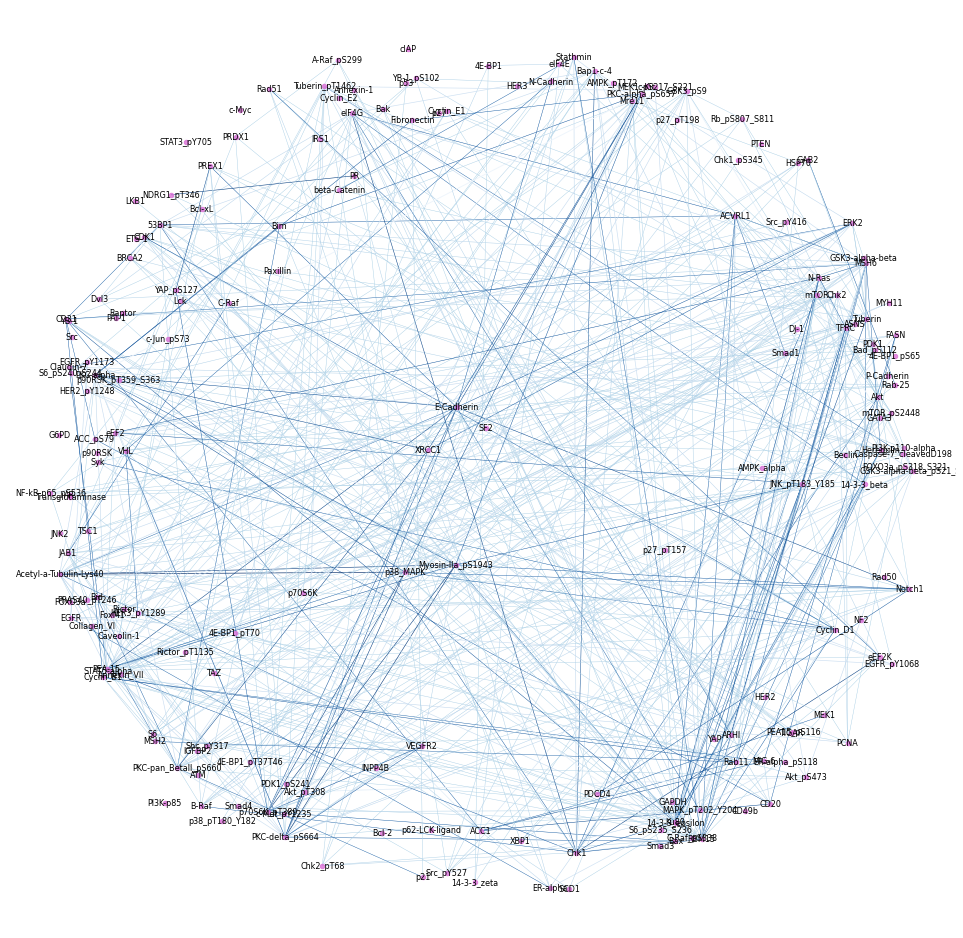

In [38]:
import networkx as nx
corrmat = X.corr()
proteoms = corrmat.index.values
corrmat = -1 * np.array(corrmat)
corrmat[np.abs(corrmat) < 0.4] = 0

G = nx.from_numpy_matrix(corrmat)
G = nx.relabel_nodes(G, lambda x: proteoms[x])
G.edges(data=True);
create_corr_network_1(G, plt.cm.Blues)

# sort by clusters

In [14]:
from sklearn.mixture import GaussianMixture
cls = GaussianMixture(
    n_components=12,
    verbose=10,
)
cls.fit(X.values.T)

Initialization 0
Initialization converged: True	 time lapse 285.70829s	 ll 27820.41861


GaussianMixture(n_components=12, verbose=10)

In [15]:
sorting = cls.predict(X.values.T)
subs = []
for i in range(20):
    subs.append(X.iloc[:,sorting==i])
subs = pd.concat(subs, axis=1)

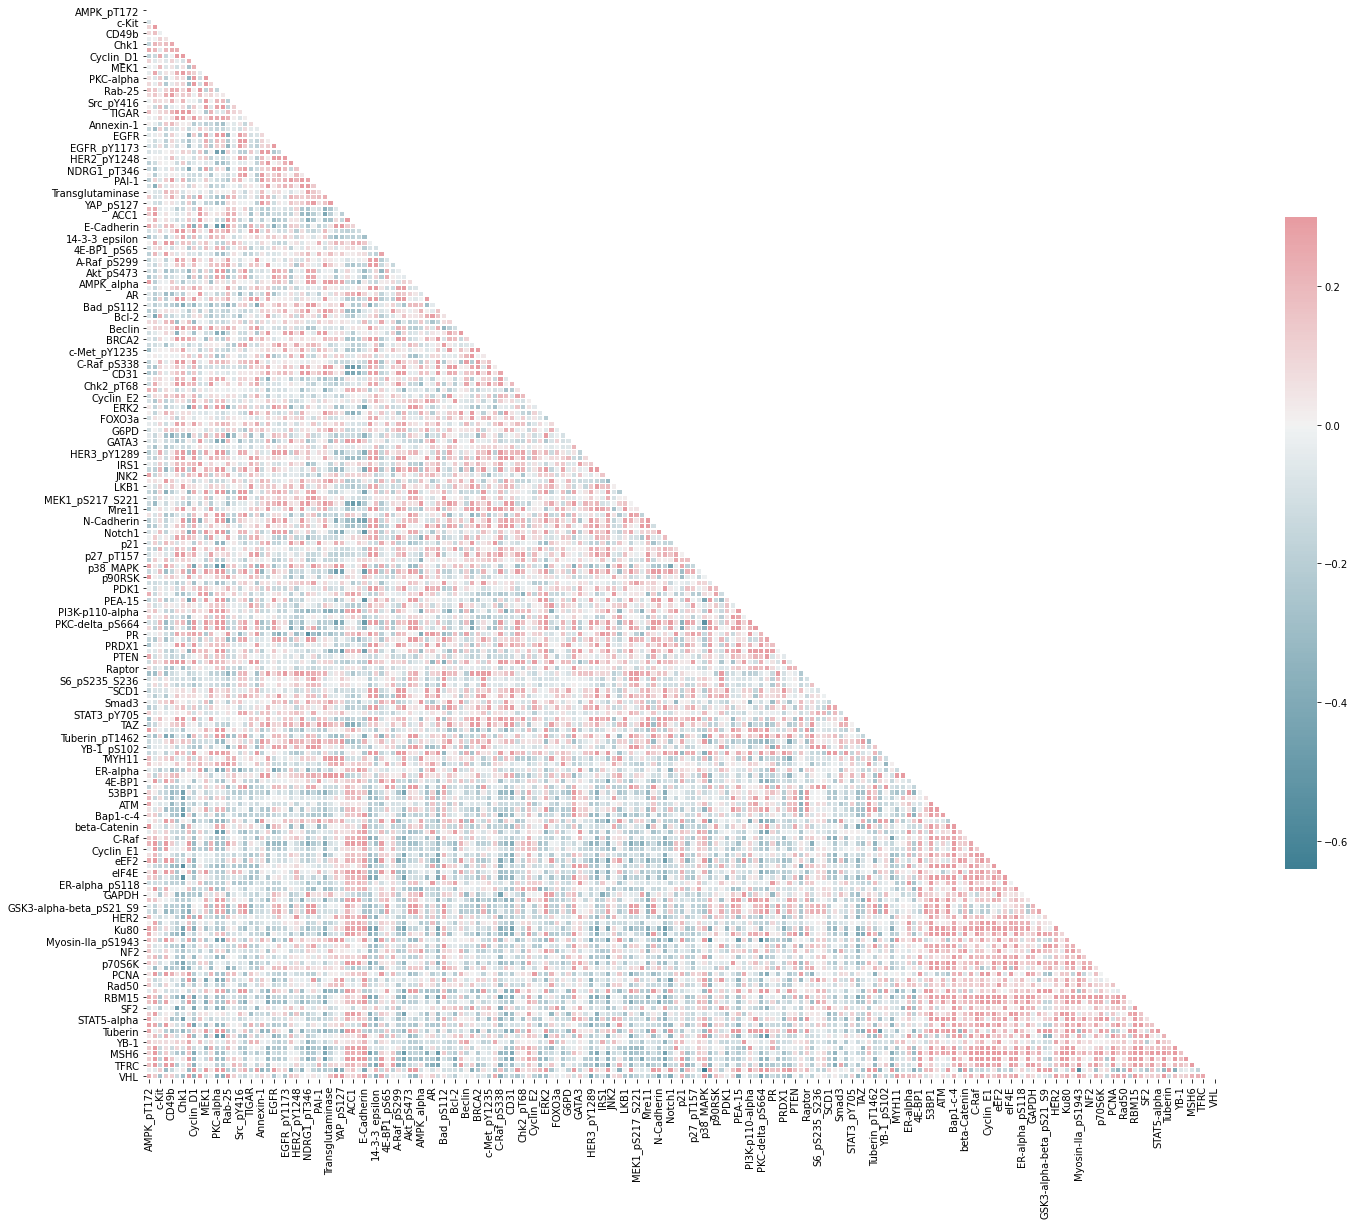

In [16]:
plot(subs)

# good, some block structure shows up!

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform

import scipy.stats as sps

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [118]:
clf = LogisticRegression(
    penalty="l2",
    verbose=0,
    n_jobs=-1,
)

search_space = {
    'C': loguniform(1e-7, 10),
    'max_iter': sps.randint(100, 10_000),
    'class_weight': ['balanced', None],
}

random_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=search_space,
    n_iter=40, 
    scoring='accuracy',
    cv=StratifiedKFold(n_splits=3),
    verbose=2, 
    n_jobs=4, 
    pre_dispatch=8
)
random_search.fit(X, y)


Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    9.4s
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:   52.3s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=LogisticRegression(n_jobs=-1), n_iter=40, n_jobs=4,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1300e32e8>,
                                        'class_weight': ['balanced', None],
                                        'max_iter': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1300e30f0>},
                   pre_dispatch=8, scoring='accuracy', verbose=2)

In [ ]:
clf.score(X, y)

In [63]:
import sklearn.metrics as m
from tqdm import tqdm

Xv = X.values
nfeat = X.shape[1]
mutmat = np.empty([nfeat, nfeat])
mutmat[:] = np.nan

def calc_MI(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = m.mutual_info_score(None, None, contingency=c_xy)
    return mi

for i in tqdm(range(nfeat)):
    for j in range(nfeat):
        mutmat[i,j] = calc_MI(Xv[:,i], Xv[:,j], 100)

100%|██████████| 189/189 [00:47<00:00,  3.95it/s]


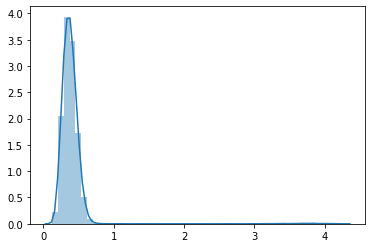

In [105]:
sns.distplot(mutmat)

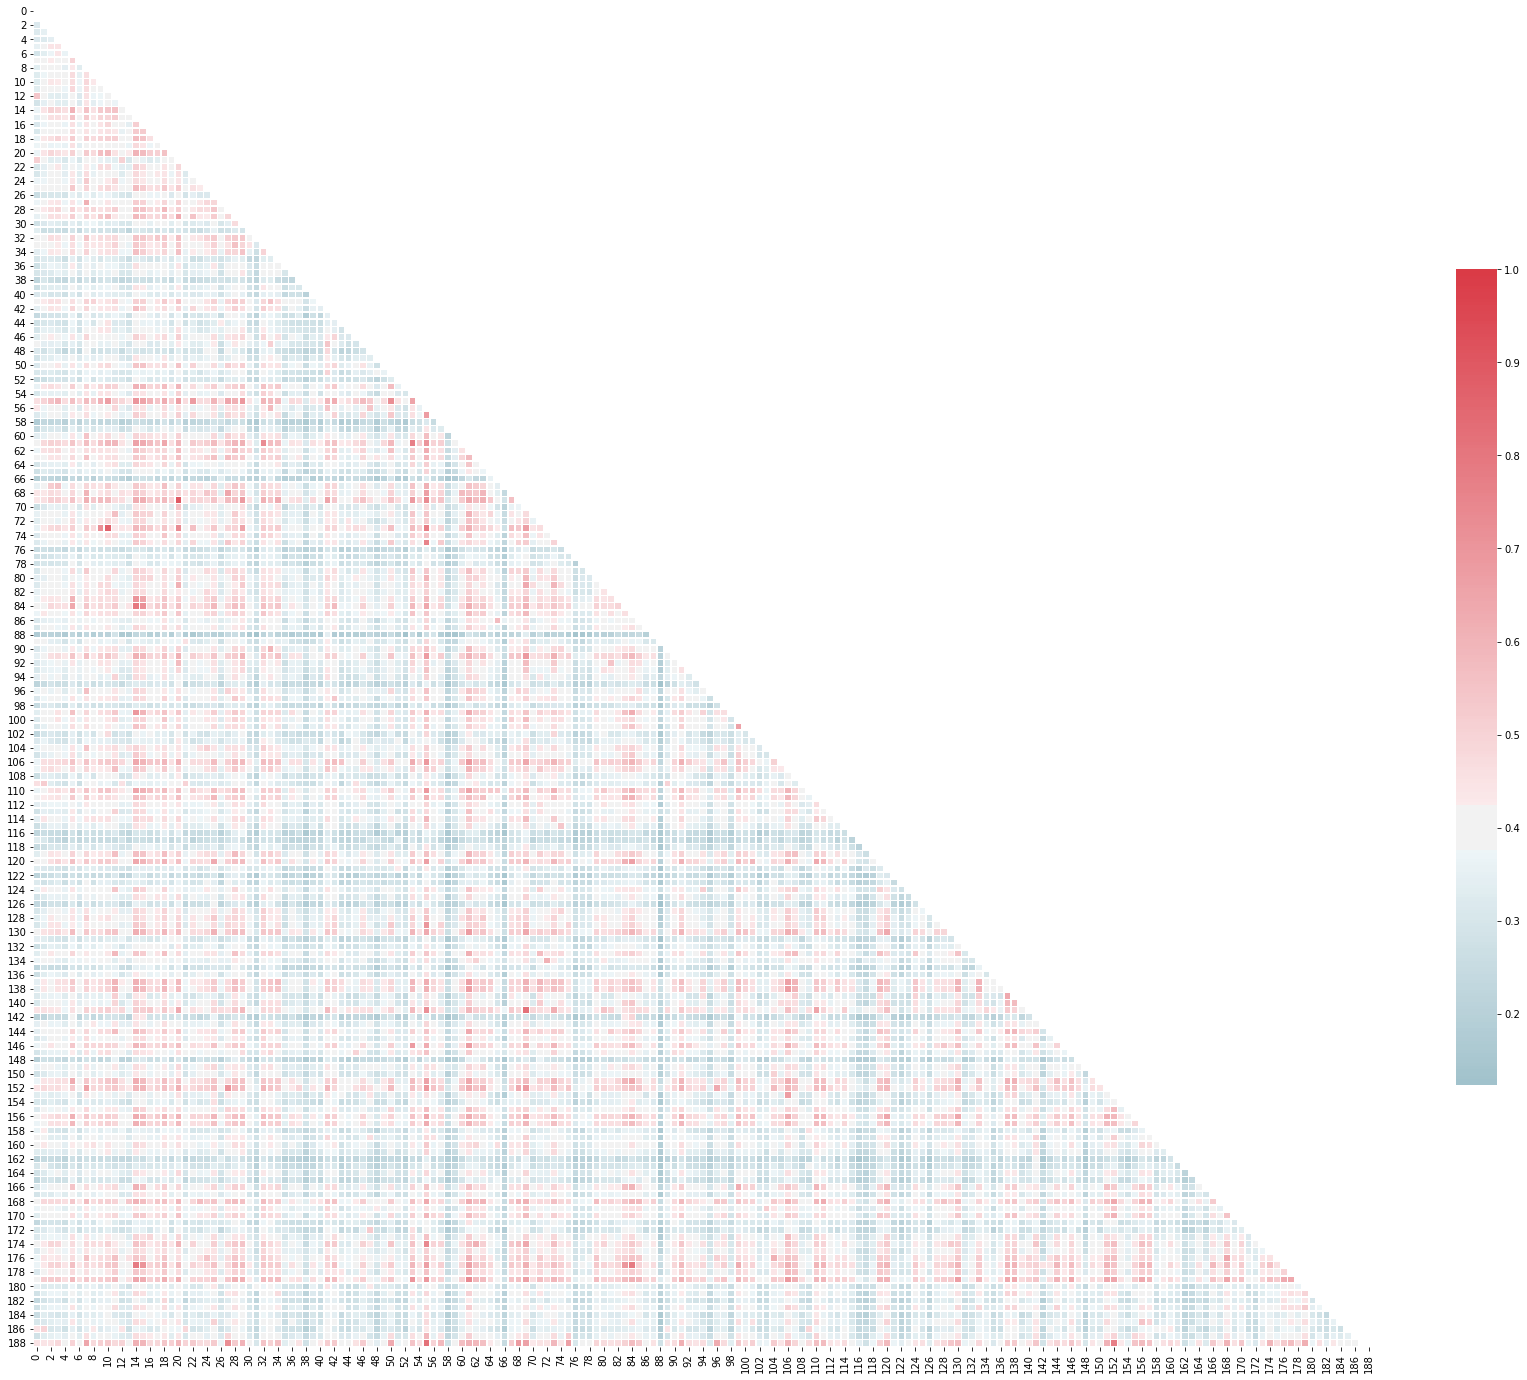

In [117]:
mask = np.triu(np.ones_like(np.ones(mutmat.shape), dtype=np.bool), -1)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(30, 30))
sns.heatmap(mutmat, mask=mask, cmap=cmap, vmax=1, center=0.4,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# can be more accurate to do with neural network?

In [ ]:
# Density ratios trick

import torch
from torch import nn
import torch.nn.functional as F



H=128
n_epoch=500


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, H)
        self.fc2 = nn.Linear(H, H)
        self.fc3 = nn.Linear(H, 1)

    def forward(self, x):
        h1 = F.relu(self.fc1(x))
        h2 = F.relu(self.fc2(h1))
        h3 = self.fc3(h2)
        return h3    

model = Net()
crit = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
plot_loss = []
MI_density_ratio = []
for epoch in tqdm(range(n_epoch)):
    x_sample=Xv[:, 0][:, None]
    y_sample=Xv[:, 1][:, None]
    y_shuffle=np.random.permutation(y_sample)
    
    x_sample = torch.from_numpy(x_sample).type(torch.FloatTensor)
    y_sample = torch.from_numpy(y_sample).type(torch.FloatTensor)
    y_shuffle = torch.from_numpy(y_shuffle).type(torch.FloatTensor)
    
    p_xy = torch.cat([x_sample, y_sample], dim=1)
    p_x_y = torch.cat([x_sample, y_shuffle], dim=1)
    labels = torch.cat([torch.ones(p_xy.size(0)), torch.zeros(p_x_y.size(0))])
    
    data_x = torch.cat([p_xy, p_x_y])
    logits = model(data_x)
    loss = crit(logits, labels.view(-1, 1))
    
    plot_loss.append(loss.data.numpy())
    z = model(p_xy)
    MI_density_ratio.append(((torch.sigmoid(z))/(1-torch.sigmoid(z))).log().mean().data.numpy())
    model.zero_grad()
    loss.backward()
    optimizer.step()
    
plt.plot(MI_density_ratio)

In [ ]:
# MINE
H=10
n_epoch = 500
data_size = 20000

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, H)
        self.fc2 = nn.Linear(1, H)
        self.fc3 = nn.Linear(H, 1)

    def forward(self, x, y):
        h1 = F.relu(self.fc1(x)+self.fc2(y))
        h2 = self.fc3(h1)
        return h2    

model = Net()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
MI_MINE = []
for epoch in tqdm(range(n_epoch)):
    x_sample=gen_x()
    y_sample=gen_y(x_sample)
    y_shuffle=np.random.permutation(y_sample)
    
    x_sample = torch.from_numpy(x_sample).type(torch.FloatTensor)
    y_sample = torch.from_numpy(y_sample).type(torch.FloatTensor)
    y_shuffle = torch.from_numpy(y_shuffle).type(torch.FloatTensor)
    
    pred_xy = model(x_sample, y_sample)
    pred_x_y = model(x_sample, y_shuffle)

    ret = torch.mean(pred_xy) - torch.log(torch.mean(torch.exp(pred_x_y)))
    loss = -ret  # maximize
    MI_MINE.append(-loss.data.numpy())
    model.zero_grad()
    loss.backward()
    optimizer.step()